# **Homework 1 : Filtering spam messages**

Author :  **Raaa**  ING5 Promo 

## **0.Importing Librairies**

First, we will import the required libraries.
This homework has been done on Google Colab. If you want to run all the programms, make sure you change the path direction


In [ ]:
#librairies useful to manage arrays
import numpy as np
import pandas as pd

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/ECE/ING5/Machine learning 2 (ING5)")
!ls

Mounted at /content/drive
'confusion matrix_dico_X_training.png'	        messages.gdoc
'Copie de filteringSpamMessages_alpha0.ipynb'   messages.txt
 filteringSpamMessages_alpha0.ipynb	       'y*_calcul.png'
 filteringSpamMessages.ipynb


## **1.Get Data**

Next, we will load the data from txt file

In [ ]:
#get data from text file
messages = pd.read_csv('messages.txt', sep='\t')
#Renaming the 2 columns
messages.columns= ["nature", "message"] 

Then, we display the 5 first lines

In [ ]:
print(messages.shape)
messages.head()

(4998, 2)


,nature,message
0,ham,Yup i've finished c ü there...
1,ham,Remember to ask alex about his pizza
2,ham,No da..today also i forgot..
3,ham,Ola would get back to you maybe not today but ...
4,ham,Fwiw the reason I'm only around when it's time...


## **2.Data Spliting**

Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%

In [ ]:
#We replace "spam" by 1 and "ham" by 1 to make the data more usable
messages["nature"] = messages["nature"].map({'spam':1, 'ham':0})

#Training set
messages_copy = messages.copy()
train_set = messages_copy.sample(frac=0.8, random_state=0) #take 80% of the messages 
print ('Training set')
X_training = train_set["message"]
Y_training = train_set["nature"]
X_training.index = [i for i in range(len(X_training))] #Rename the index of X_training by [0,1,2,3,...,len(X_training)]
Y_training.index = [i for i in range(len(Y_training))] #Rename the index of Y_training by [0,1,2,3,...,lenY_training)]
print("Number of spams : ",Y_training.sum(),"/",len(Y_training)," (",round(Y_training.sum()/len(Y_training)*100,2),"%)\n")


#Test set
test_set = messages_copy.drop(train_set.index)
print ('Test set')
X_test = test_set["message"]
Y_test = test_set["nature"]
X_test.index = [i for i in range(len(X_test))]
Y_test.index = [i for i in range(len(Y_test))]
print("Number of spams : ",Y_test.sum(),"/",len(Y_test)," (",round(Y_test.sum()/len(Y_test)*100,2),"%)\n")


Training set
Number of spams :  523 / 3998  ( 13.08 %)

Test set
Number of spams :  149 / 1000  ( 14.9 %)



In [ ]:
print(len(X_training))
X_training

3998


0       Oops sorry. Just to check that you don't mind ...
1       She just broke down a list of reasons why nobo...
2       What u talking bout early morning? It's almost...
3       I don wake since. I checked that stuff and saw...
4       For you information, IKEA is spelled with all ...
                              ...                        
3993    Men always needs a beautiful, intelligent, car...
3994    PRIVATE! Your 2003 Account Statement for 07808...
3995    Nice. Wait...should you be texting right now? ...
3996    Night has ended for another day, morning has c...
3997    Thanks for sending this mental ability question..
Name: message, Length: 3998, dtype: object

In [ ]:
print(len(X_test))
X_test

1000


0                         Yup i've finished c ü there...
1                                   Who u talking about?
2      Misplaced your number and was sending texts to...
3                                 Sorry, I'll call later
4      FREE entry into our £250 weekly comp just send...
                             ...                        
995    Becoz its  &lt;#&gt;  jan whn al the post ofic...
996    Lol grr my mom is taking forever with my presc...
997    Fffff. Can you text kadeem or are you too far ...
998                        Dont know you bring some food
999    I'll be in sch fr 4-6... I dun haf da book in ...
Name: message, Length: 1000, dtype: object

## **3.Creation of dictionnary**

 We generate a dictionary from the training data. The programm is almost identical from this website https://appliedmachinelearning.blog/2017/01/23/email-spam-filter-python-scikit-learn/

In [ ]:
from collections import Counter


#Creation of dictionnary based on the training set
def makeDictionnary(X):
    all_words = []
    for messages in X:
      #print(messages, "\n")
      words = messages.split(" ")
      for msg in words:
        #print(msg)
        all_words.append(msg) 
 
    dictionary = Counter(all_words)
    for item in list(dictionary): # this works with python 3.x version
      if item.isalpha() == False:
        del dictionary[item]  
      elif len(item) == 1:
        del dictionary[item]
    dictionary = dictionary.most_common(3000)
    return dictionary

In [ ]:
dico = makeDictionnary(X_training)
print(dico)

[('to', 1537), ('you', 1204), ('the', 868), ('and', 630), ('is', 565), ('in', 562), ('for', 467), ('my', 441), ('of', 424), ('me', 413), ('your', 394), ('on', 337), ('have', 319), ('that', 310), ('are', 304), ('it', 288), ('call', 266), ('or', 265), ('at', 262), ('be', 259), ('with', 251), ('not', 251), ('will', 245), ('get', 240), ('so', 225), ('can', 221), ('ur', 214), ('but', 195), ('You', 190), ('do', 185), ('up', 179), ('from', 179), ('when', 174), ('go', 173), ('just', 172), ('know', 171), ('all', 167), ('if', 166), ('this', 162), ('we', 155), ('like', 152), ('out', 151), ('got', 149), ('come', 147), ('was', 143), ('now', 142), ('am', 136), ('want', 118), ('about', 117), ('by', 114), ('Call', 113), ('what', 110), ('send', 106), ('only', 105), ('going', 103), ('time', 102), ('then', 102), ('If', 101), ('need', 101), ('its', 100), ('one', 98), ('our', 96), ('still', 95), ('he', 93), ('But', 92), ('as', 91), ('How', 90), ('some', 89), ('been', 89), ('has', 89), ('how', 88), ('So', 8

## **4.Extract features**

We extract features from both the training data and test data.  The programm is almost identical from this website https://appliedmachinelearning.blog/2017/01/23/email-spam-filter-python-scikit-learn/

In [ ]:
#Extraction of features
def extract_features(dictionary, X):
  features_matrix = np.zeros((len(X), 3000))
  docID = 0
  for messages in X:
  #for i, line in enumerate(fi):
  #if i == 2:
    words = messages.split(" ")
    for word in words:
      wordID = 0
      for i, d in enumerate(dictionary):
        if d[0] == word:
          wordID = i
          features_matrix[docID, wordID] = words.count(word)
    docID = docID + 1
  return features_matrix


In [ ]:
#Extract feature for training set
features_matrix_train = extract_features(dico, X_training)
print(features_matrix_train.shape)
print(features_matrix_train)

(3998, 3000)
[[1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 2. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Extract features for test set
features_matrix_test = extract_features(dico, X_test)
print(features_matrix_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 2. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(features_matrix_test.shape)

(1000, 3000)


## **5.Naives Bayes Algorithm**

We implement the Naive Bayes from scratch, fit the respective models to the training data (the programm is ran at the end of this .ipynb file because it takes a very long time to compute)

IN the Naive BAyes algorithm, we'll compute

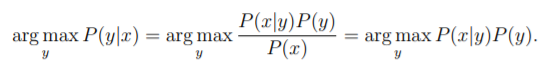

By using the Laplace smoothing technique with an α: 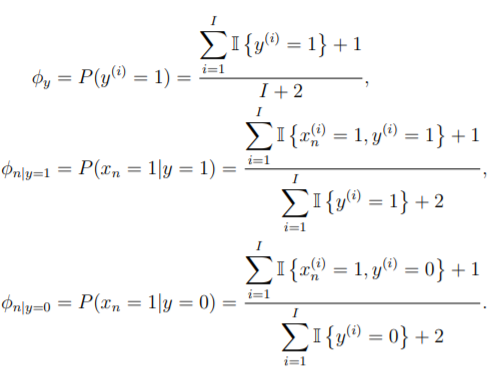

To avoid to get a zero value when we'll multipy all the probabilities 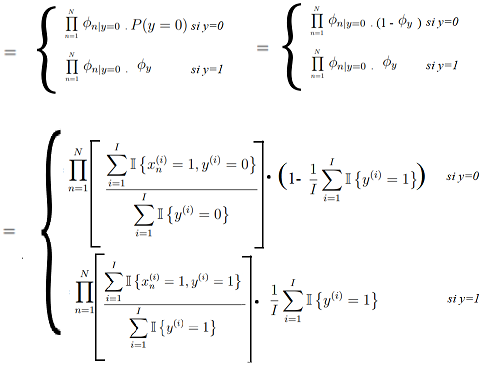

Finally, we make predictions for the training and test data

In [ ]:
def NaiveBayes(X,Y):
    # X and Y are both DataFrame
    #X is the X_training or X_test
    #Y is the Y_training or Y_test
    if len(X)!=len(Y):
        #In order to avoid X_test and Y_train as input data
        return "LENGTH ERROR IN THE INPUT DATA !"
    else:
        features_matrix = extract_features(dico, X)
        (I, N) = features_matrix.shape ##(nb of msg, nb of words) , I = len(Y)
        y_predict = np.zeros((I,2)) 
        
        #Laplace smoothing technique
        #Compute Phi_y_MLE = P(Y=1)
        alpha = 0.1 #Chosen arbitrarily
        Phi_y_MLE = (Y.sum()+1*alpha) / (I+2*alpha) #P(Y=1)
        
        #1st loop aims to fill the ith line of y_predict
        for i in range(I): #loop for each message 
            message = [wordIndex for wordIndex in range(N) if features_matrix[i][wordIndex]>0 ] #return les index où le mot est supérieur ou égal à 1
            n = len(message)
#            print(i, message)
            
            for y in range(2):#==>loop aims to fill the ith column of y_predict in oder to compute P(x|y)*P(y) for a given y ={0,1}
                PXn_y = 1 # to compute P(X|y)
                
                for wordIndex in message:#read the index of the words in the features_matrix
                    
                    #Start computing phi_n|y_MLE = P(Xn(i)|y) which is the variable "SUM" named here. 
                    SUM = 0
                    for line in range(I):
                        if (features_matrix[line][wordIndex]>0 and Y[line]==y):
                            SUM += features_matrix[line][wordIndex]
#                    End of loop to compute SUM

                    if (y==0): 
                        PXn_y =  PXn_y * (SUM + alpha)/(I-Y.sum() + 2*alpha)  #P(Xn(i)|y=0) Laplace smoothing technique
                    else:
                        PXn_y =  PXn_y * (SUM + alpha)/(Y.sum() + 2*alpha)  #P(Xn(i)|y=1) Laplace smoothing technique
#                Computation of  P(X|y) finished with y=0 or y=1
                    
                if (y==0):
                    y_predict[i][y] = PXn_y  * (1-Phi_y_MLE) #P(x|y=0)*P(y=0)
                else: 
                    y_predict[i][y] = PXn_y * Phi_y_MLE #P(x|y=1)*P(y=1)
#            print(i, y_predict[i])
#        print(y_predict) #print both y* for y=0 and y=1
        
        #Return the index of the max value of the line i  
        y_predict = np.argmax(y_predict, axis=1) # y* computed, Dim(y_predict)=(1,I)
        
        return y_predict

In [ ]:
y_predict_test = NaiveBayes(X_test, Y_test)

## **6.Confusion Matrix**

To discuss our results, we measure the spam-filtering performance through the confusion matrix

In [ ]:
#we create our confusion matrix
def confusionMatrix(Y_actual, Y_predict):
    if len(Y_actual)!=len(Y_predict):
        print("LENGTH ERROR IN THE INPUT DATA !")
    else:
        TN = 0 # True Negative
        TP = 0 # True Positive
        FN = 0 # False Negative
        FP = 0 # False Positive 
        for i in range(len(Y_actual)):
            #we count the true negative
            if (Y_actual[i] == Y_predict[i] and Y_predict[i] == 0):
                TN += 1
            #we count the true positive
            elif (Y_actual[i] == Y_predict[i] and Y_predict[i] == 1):
                TP += 1
            #we count the false negative
            elif (Y_actual[i] == 1 and Y_predict[i] == 0):
                FN += 1
            #we count the false positive
            elif (Y_actual[i] == 0 and Y_predict[i] == 1):
                FP += 1
        print("\t\t\t\t\ty_actual")
        print("\t\t\t\tPositive\t\t\tNegative")
        print("\t\tPositive\t",TP,"\t\t\t\t",FP)
        print("y_predict")
        print("\t\tNegative\t",FN,"\t\t\t\t",TN)
        
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        accuracy = (TP + TN)/len(Y_actual)
        print("precision : ", round(precision*100,2),"%")
        print("recall :  ", round(recall*100,2),"%")
        print("accuracy :  ", round(accuracy*100,2),"%")

In [ ]:
#we display our confusion matrix
confusionMatrix(Y_test, y_predict_test)

					y_actual
				Positive			Negative
		Positive	 146 				 21
y_predict
		Negative	 3 				 830
precision :  87.43 %
recall :   97.99 %
accuracy :   97.6 %



Predictions with the training data



In [ ]:
y_predict_training = NaiveBayes(X_training, Y_training)
confusionMatrix(Y_training, y_predict_training)

					y_actual
				Positive			Negative
		Positive	 517 				 80
y_predict
		Negative	 6 				 3395
precision :  86.6 %
recall :   98.85 %
accuracy :   97.85 %


## **7.Analyse of results**

We can observe that our accuracy in both training and test sets is quite good (~98%), same for precision (87%) and accuracy recall (98%). The performance of the spam-filter depends on the rules when we create our dictionary and our chosen α.
Moreover, for simplication, we supposed that our data is independant although we know that in NLP it is not true. We could cleaned better our data by adding nuew rules : for example, “include”, “includes,” and “included” would all be represented as “include” 